# Manual Analyses for Data Engineering Project
This notebook is purely for the development of the Data Engineering project.
It is not part of the final pipeline, nor should it contain any code that is vital to it.

## Imports

In [1]:

import data_quality.data_quality_assessor
import datasets.untappd

import pandas as pd
import seaborn as sns

## Setup

In [2]:

pd.options.display.float_format = '{:.2f}'.format
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set_theme(rc={'figure.figsize':(8, 12)})

## Data Quality
### General Overview

In [3]:
dataset = datasets.untappd.UntappdDataset()

data_quality_assessor = data_quality.data_quality_assessor.DataQualityAssessor(dataset=dataset.df)

data_quality_assessor.dataset.head()

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,venue_lat,venue_lng,rating_score,created_at,checkin_url,beer_url,brewery_url,brewery_country,brewery_city,brewery_state,flavor_profiles,purchase_venue,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
0,Brunch Blanche,Moersleutel Craft Brewery,Stout - White / Golden,9.00,0,NaN,Avisi,Arnhem,Gelderland,Nederland,51.98,5.90,3.75,2022-11-29 20:11:57,https://api.untappd.com/c/1225258656,https://api.untappd.com/beer/4807984,https://api.untappd.com/brewery/269726,Netherlands,Alkmaar,Noord-Holland,NaN,NaN,Can,1225258656,4807984,269726,https://untappd.s3.amazonaws.com/photos/2022_1...,3.69,3.69,"Stefan Jansen,Marcel van Heerdt,Erik Evers",4,3
1,May the S'mores Be With You,Moersleutel Craft Brewery,Stout - Imperial / Double Pastry,11.00,0,NaN,Avisi,Arnhem,Gelderland,Nederland,51.98,5.90,4.00,2022-11-29 20:27:09,https://api.untappd.com/c/1225262537,https://api.untappd.com/beer/4764681,https://api.untappd.com/brewery/269726,Netherlands,Alkmaar,Noord-Holland,"chocolate,coffeeish,fatty,smooth",NaN,Can,1225262537,4764681,269726,https://untappd.s3.amazonaws.com/photos/2022_1...,4.05,4.04,"Stefan Jansen,Marcel van Heerdt,Erik Evers",2,0
2,Blueberry Maple Syrup Pancake,Moersleutel Craft Brewery,Sour - Smoothie / Pastry,5.00,0,NaN,Avisi,Arnhem,Gelderland,Nederland,51.98,5.90,3.25,2022-11-29 20:43:57,https://api.untappd.com/c/1225266568,https://api.untappd.com/beer/4537425,https://api.untappd.com/brewery/269726,Netherlands,Alkmaar,Noord-Holland,"sour,syrupy,maple",NaN,Can,1225266568,4537425,269726,https://untappd.s3.amazonaws.com/photos/2022_1...,3.45,3.47,"Stefan Jansen,Marcel van Heerdt,Erik Evers",2,0
3,Smeerolie Mexicake (2022),Moersleutel Craft Brewery,Stout - Imperial / Double,11.00,55,NaN,Avisi,Arnhem,Gelderland,Nederland,51.98,5.90,4.00,2022-12-02 16:53:10,https://api.untappd.com/c/1225816509,https://api.untappd.com/beer/4690493,https://api.untappd.com/brewery/269726,Netherlands,Alkmaar,Noord-Holland,"chocolate,vanilla,thick",NaN,Can,1225816509,4690493,269726,https://untappd.s3.amazonaws.com/photos/2022_1...,4.08,4.05,"Marcel van Heerdt,Erik Evers",2,0
4,LeFort,Omer Vander Ghinste,Brown Ale - Imperial / Double,10.00,18,NaN,Avisi,Arnhem,Gelderland,Nederland,51.98,5.90,3.75,2022-12-02 17:53:17,https://api.untappd.com/c/1225834673,https://api.untappd.com/beer/504924,https://api.untappd.com/brewery/5213,Belgium,Kortrijk,Vlaams Gewest,"dark,strong",NaN,Bottle,1225834673,504924,5213,https://untappd.s3.amazonaws.com/photos/2022_1...,3.62,3.62,"Erik Evers,Marcel van Heerdt",2,0


### Boxplots of Continuous Features

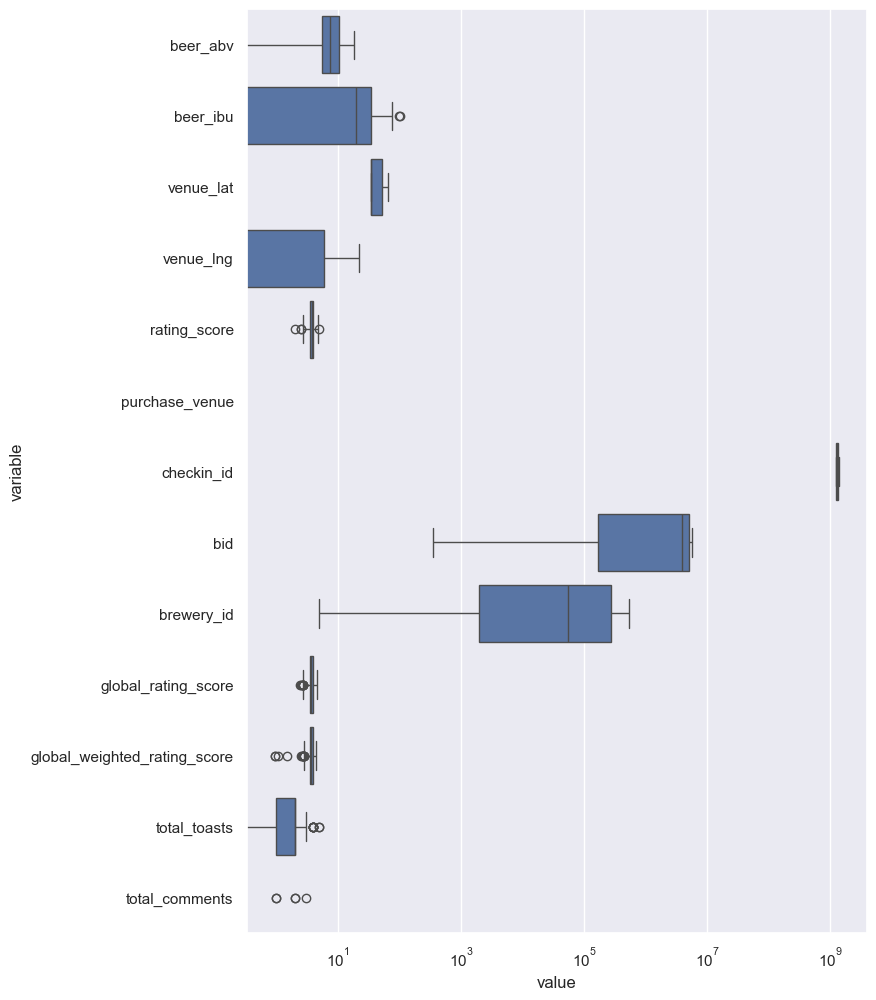

In [4]:
data_quality_assessor.draw_boxplots()

### Distribution of Categorical Feature

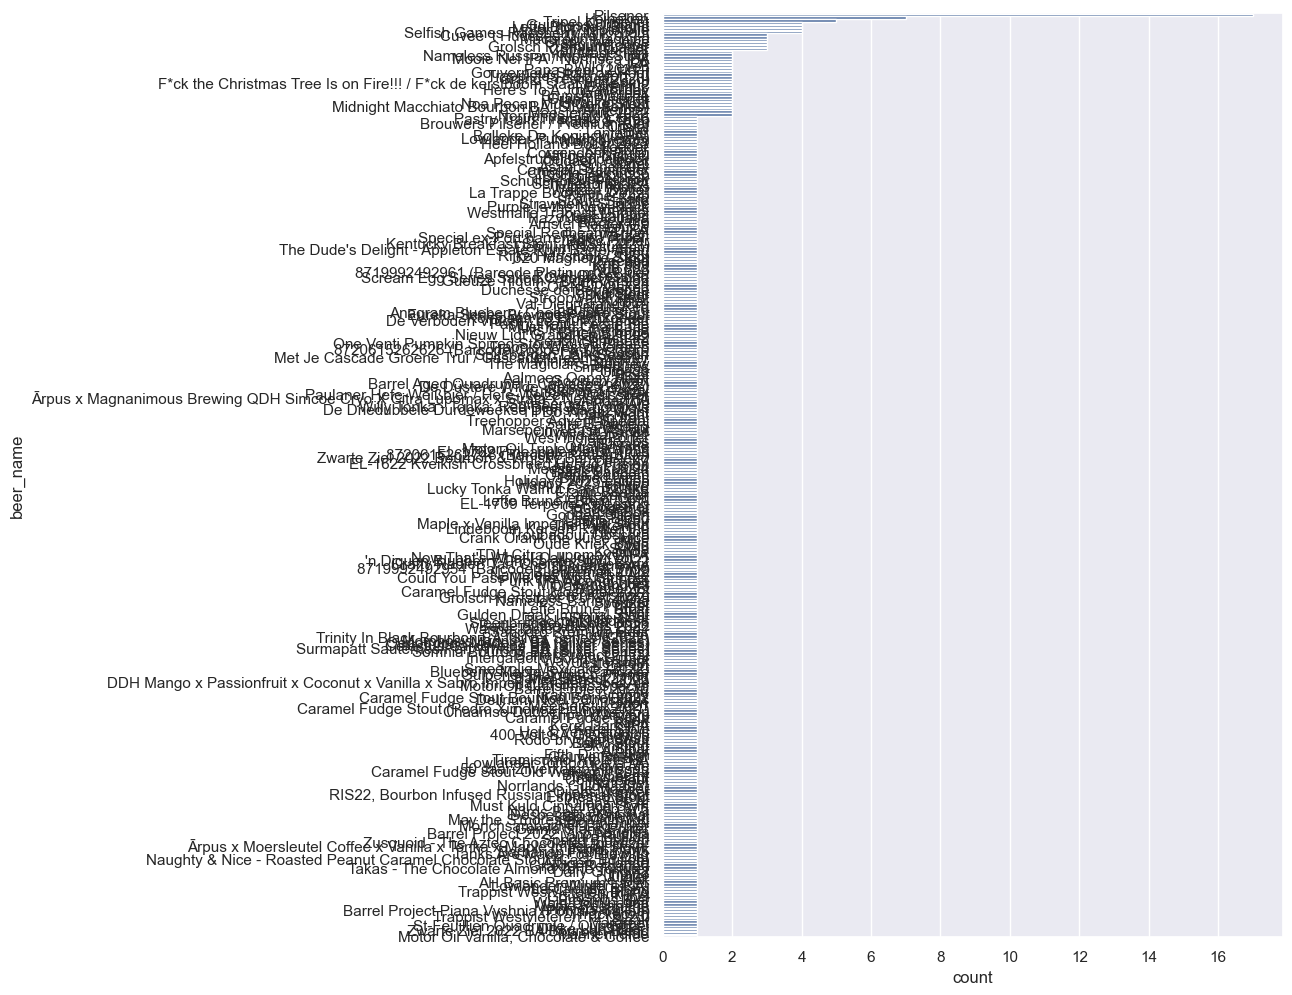

In [5]:
FEATURE_NAME = "beer_name"

data_quality_assessor.draw_categorical_feature(FEATURE_NAME)

### Distribution of Continuous Feature

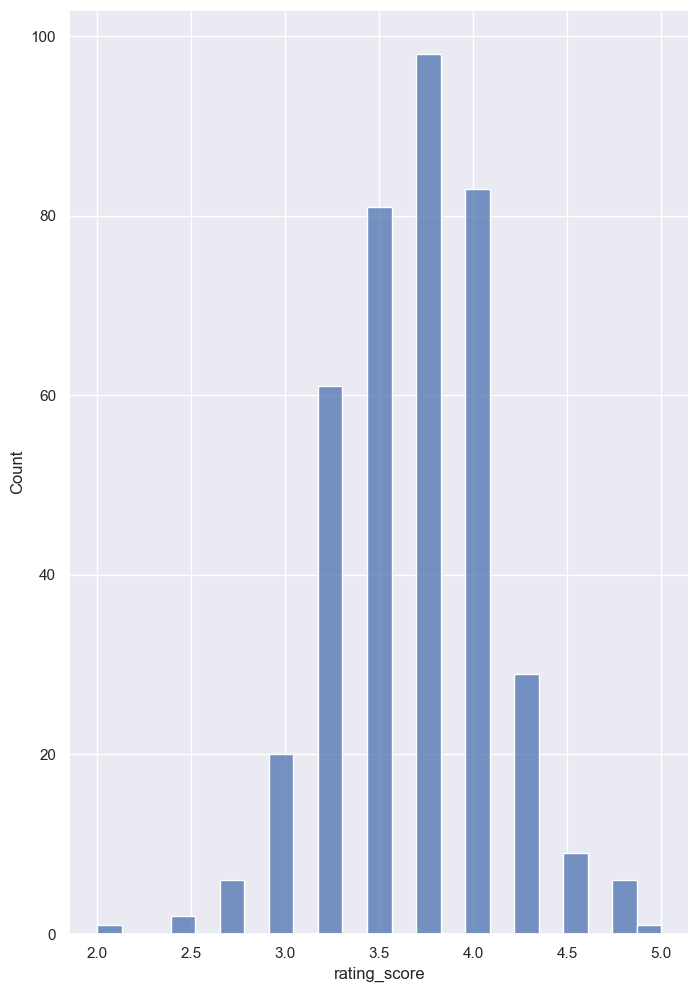

In [6]:
FEATURE_NAME = "rating_score"

data_quality_assessor.draw_continuous_feature(FEATURE_NAME)

### Rates of NULL Values

In [7]:
data_quality_assessor.get_null_rates()

,NULL Rate
beer_name,0.00
brewery_name,0.00
beer_type,0.00
beer_abv,0.00
beer_ibu,0.00
comment,0.77
venue_name,0.02
venue_city,0.56
venue_state,0.04
venue_country,0.02


### Rate of Duplicate Rows

<Axes: xlabel='rating_score', ylabel='beer_abv'>

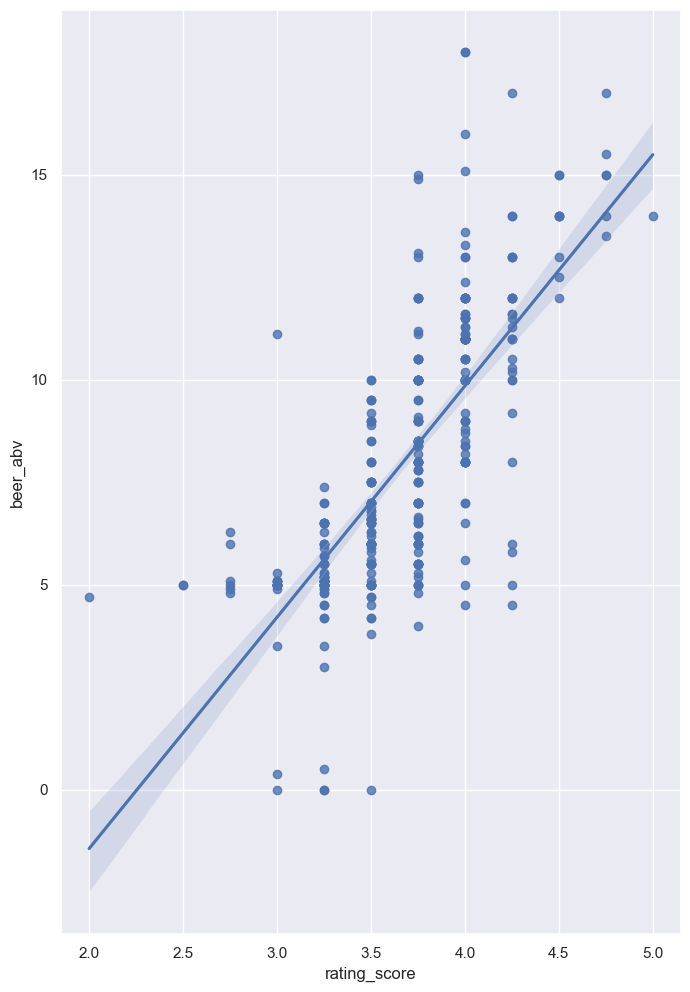

In [9]:
PRIMARY_KEY = ["beer_name", "brewery_name"]

data_quality_assessor.get_duplicate_rate(primary_key=PRIMARY_KEY)
sns.regplot(data=data_quality_assessor.dataset, y="beer_abv", x="rating_score")